<a href="https://colab.research.google.com/github/jaiieth/DataRockie-Bootcamp_Project/blob/main/Python/HW_Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all essential libraries

In [1]:
from random import choice
from datetime import datetime
from time import sleep
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Define Functions

In [2]:
hands = ['Rock','Paper','Scissors']
    
    #hand functions
def random():
    return choice(hands)
def choose():
    select = int(input('Choose your hand'))
    return hands[select-1]
        

In [3]:
# game functions
def mainmenu():
    while True:
        sleep(0.1)
        print('### Main menu ###')
        print('(1) Start Game')
        print('(2) Stats')
        print('(3) Exit')
        menu_sel = input('Please enter number: ')
        if not(menu_sel in ['1','2','3']):
            print('Please enter number')
        elif menu_sel == '1':
            sleep(0.1)
            play()
        elif menu_sel == '2':
            if len(stat)!=0:
                stat_disp()
            else:
                print('No stat found')
                sleep(0.1)
        else:
            print('Thank you for playing')
            break;
    
def play():
    goback = 0
    while goback == 0:
        print(f'Streak: {streak}')
        print('Choose your hand')
        print('(1) Rock')
        print('(2) Paper')
        print('(3) Scissor')
        print('(4) Main Menu')
        select = input('Choose your hand: ')
        if not (select in ['1','2','3','4']):
            select = input('Choose your hand: ')
            sleep(0.3)
        elif select in ['1','2','3']:
            global gameno
            gameno += 1
            global user
            user = hands[int(select)-1]
            com = random()
            print(f'You Choose: {user}')
            sleep(0.1)
            print(f'Com Choose: {com}')
            sleep(0.1)
            if (((user == hands[0]) & (com == hands[0]))|
                ((user == hands[1]) & (com == hands[1]))|
                ((user == hands[2]) & (com == hands[2]))):
                draw()
                save()
                sleep(0.1)
            elif (((user == hands[0]) & (com == hands[1]))|
                ((user == hands[1]) & (com == hands[2]))|
                ((user == hands[2]) & (com == hands[0]))):
                lose()
                save()
                sleep(0.1)
            else:
                win()
                save()
                sleep(0.1)
        else: 
            goback = 1
            mainmenu()          
            sleep(0.1)   
            
def save():
    global stat
    newstat = pd.Series({'Game_No':gameno,
                    'Date':datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                    'Hand':user,
                    'Result':result,
                    'Streak':streak,
                    'User':username})
    stat = stat.append(newstat, ignore_index=True)
def stat_disp():
    stat.groupby('Hand').User.count().plot.pie(autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*stat.groupby('Hand').size().sum()),
                                        figsize=(3,3),
                                        fontsize=8,
                                        ylabel='',
                                        title='Hands')
    winrate = round((stat.query('Result=="Win"').User.count() / stat.User.count()*100),2)
    rate = stat.groupby(['Hand']).Result.value_counts(sort=True,ascending=False)
    print(f"Winrate: {winrate}%")
    print(rate)
    print(stat)
def win():
    global streak
    global result
    print('Result : Win')
    streak += 1
    result = 'Win'
    
def lose():
    global streak
    global result
    print('Result : Lose')
    streak = 0
    result = 'Lose'
def draw():
    global result
    print('Result : Draw')
    result = 'Draw'
    
    
    

## Welcome Page

Welcome to Rock Paper Scissors game
Please enter your name
Name: tewst156
Welcome TEWST156
### Main menu ###
(1) Start Game
(2) Stats
(3) Exit
Please enter number: 1
Streak: 0
Choose your hand
(1) Rock
(2) Paper
(3) Scissor
(4) Main Menu
Choose your hand: 2
You Choose: Paper
Com Choose: Paper
Result : Draw
Streak: 0
Choose your hand
(1) Rock
(2) Paper
(3) Scissor
(4) Main Menu
Choose your hand: 4
### Main menu ###
(1) Start Game
(2) Stats
(3) Exit
Please enter number: 2
Winrate: 0.0%
Hand   Result
Paper  Draw      1
Name: Result, dtype: int64
   Game_No                 Date   Hand Result  Streak      User
0        1  2022-11-17 05:05:51  Paper   Draw       0  tewst156
### Main menu ###
(1) Start Game
(2) Stats
(3) Exit
Please enter number: 3
Thank you for playing
### Main menu ###
(1) Start Game
(2) Stats
(3) Exit
Please enter number: 3
Thank you for playing


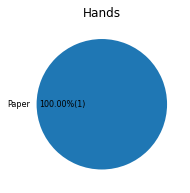

In [6]:
stat = pd.DataFrame({'Game_No':pd.Series(dtype='int'),
                'Date':pd.Series(dtype='str'),
                'Hand':pd.Series(dtype='str'),
                'Result':pd.Series(dtype='str'),
                'Streak':pd.Series(dtype='int'),
                'User':pd.Series(dtype='str')})
gameno = 0
streak = 0
result = ''
print('Welcome to Rock Paper Scissors game')
print('Please enter your name')
username = input('Name: ')
print(f'Welcome {username.upper()}')
sleep(0.1)
mainmenu()